In [1]:
import pandas as pd
df = pd.read_csv('../data/hansard_archive/hansard_speeches_processed.csv', nrows = 64)

import sys
sys.path.append('../gtm/')

from corpus import GTMCorpus
train_dataset = GTMCorpus(
    df, 
    prevalence = "~ party", 
    content = "~ party",
    vectorizer_args={'ngram_range':(1, 2), 'max_df':0.99, 'min_df':0.01}
)

from optimizer import GTMOptimizer
opt = GTMOptimizer(n_topics = [10,20,30], n_samples = 10)
opt.optimize(train_dataset)

/home/germain/Documents/topic models/generalized_topic_model/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/germain/Documents/topic models/generalized_topic_model/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/germain/Documents/topic models/generalized_topic_model/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'num

Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to Epoch 1
Early stopping at Epoch 2. Reverting to 

In [2]:
opt.grid

,n_topics,doc_topic_prior,alpha,encoder_input,encoder_hidden_layer,encoder_non_linear_activation,encoder_bias,decoder_hidden_layer,decoder_non_linear_activation,decoder_bias,predictor_hidden_layer,predictor_non_linear_activation,seed,config_id,diversity
0,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,0,1,0.890000
1,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,1,1,0.870000
2,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,2,1,0.890000
3,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,3,1,0.880000
4,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,4,1,0.910000
5,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,5,1,0.890000
6,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,6,1,0.880000
7,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,7,1,0.910000
8,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,8,1,0.900000
9,10,logistic_normal,0.1,bow,[],relu,True,[],relu,True,[],relu,9,1,0.910000


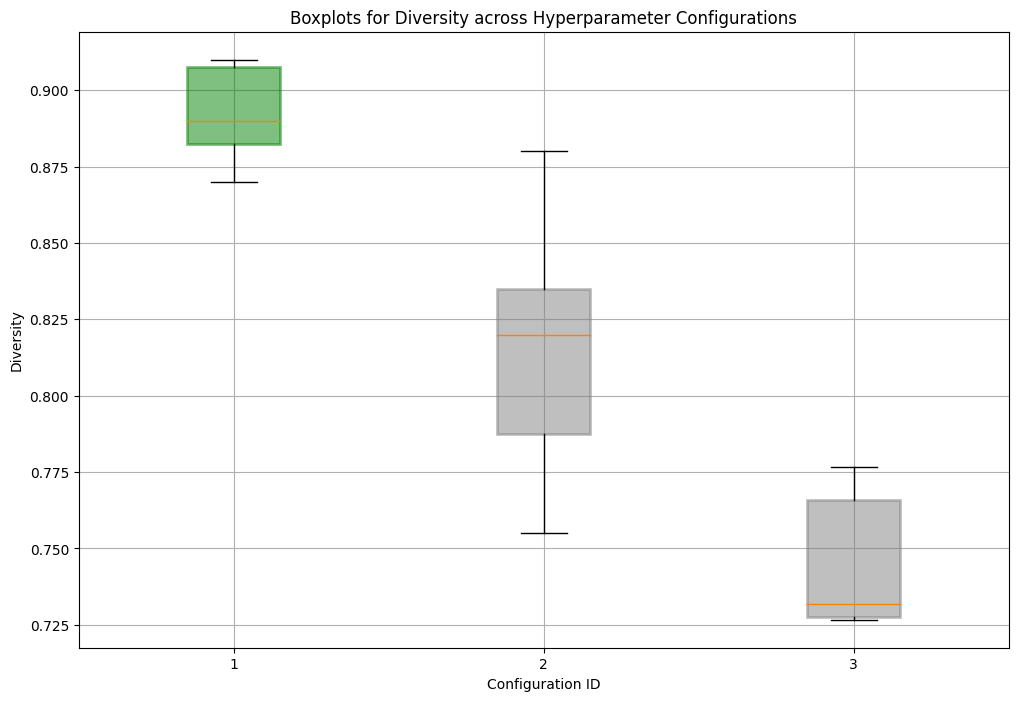

In [3]:
opt.plot_evaluation_metric(metric = "diversity")

In [4]:
best_model_params, gtm = opt.get_best_model(metric = 'diversity')

In [5]:
best_model_params

{'n_topics': 10,
 'doc_topic_prior': 'logistic_normal',
 'alpha': 0.1,
 'encoder_input': 'bow',
 'encoder_hidden_layer': [],
 'encoder_non_linear_activation': 'relu',
 'encoder_bias': True,
 'decoder_hidden_layer': [],
 'decoder_non_linear_activation': 'relu',
 'decoder_bias': True,
 'predictor_hidden_layer': [],
 'predictor_non_linear_activation': 'relu',
 'seed': 4,
 'config_id': 1,
 'diversity': 0.91}